In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=242848854833581b56787f1ca58dd1ad


In [8]:
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | humaita
Processing Record 2 of Set 1 | taoudenni
Processing Record 3 of Set 1 | tuatapere
Processing Record 4 of Set 1 | mehriz
Processing Record 5 of Set 1 | dibrugarh
Processing Record 6 of Set 1 | kahului
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | banyuwangi
Processing Record 9 of Set 1 | hun
Processing Record 10 of Set 1 | sinnamary
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | souillac
Processing Record 13 of Set 1 | mazyr
Processing Record 14 of Set 1 | vallenar
Processing Record 15 of Set 1 | kununurra
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | cockburn town
Processing Record 20 of Set 1 | santa isabel
Processing Record 21 of Set 1 | vila franca do campo
Processing Record 22 of Set 1 | victoria
Processing Record 23 of Set 1 

Processing Record 36 of Set 4 | hofn
Processing Record 37 of Set 4 | sao jose da coroa grande
Processing Record 38 of Set 4 | dikson
Processing Record 39 of Set 4 | longyearbyen
Processing Record 40 of Set 4 | leningradskiy
Processing Record 41 of Set 4 | pangnirtung
Processing Record 42 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 43 of Set 4 | vestmannaeyjar
Processing Record 44 of Set 4 | zapolyarnyy
Processing Record 45 of Set 4 | nanortalik
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | viradouro
Processing Record 48 of Set 4 | omsukchan
Processing Record 49 of Set 4 | bereda
Processing Record 50 of Set 4 | pilar
Processing Record 1 of Set 5 | lolua
City not found. Skipping...
Processing Record 2 of Set 5 | mutsamudu
City not found. Skipping...
Processing Record 3 of Set 5 | northam
Processing Record 4 of Set 5 | ballina
Processing Record 5 of Set 5 | puerto ayora
Processing Record 6 of Set 5 | maragogi
Processing Record 7 of Set 5 |

Processing Record 25 of Set 8 | cotonou
Processing Record 26 of Set 8 | shelburne
Processing Record 27 of Set 8 | bastrop
Processing Record 28 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 29 of Set 8 | sao bento do sul
Processing Record 30 of Set 8 | hihifo
City not found. Skipping...
Processing Record 31 of Set 8 | port macquarie
Processing Record 32 of Set 8 | arlit
Processing Record 33 of Set 8 | villa bisono
Processing Record 34 of Set 8 | hami
Processing Record 35 of Set 8 | opuwo
Processing Record 36 of Set 8 | margate
Processing Record 37 of Set 8 | kyaikto
Processing Record 38 of Set 8 | satitoa
City not found. Skipping...
Processing Record 39 of Set 8 | caborca
Processing Record 40 of Set 8 | onega
Processing Record 41 of Set 8 | toplita
City not found. Skipping...
Processing Record 42 of Set 8 | hohhot
Processing Record 43 of Set 8 | byron bay
Processing Record 44 of Set 8 | tari
Processing Record 45 of Set 8 | albertville
Processing Record 46 of Set 8 

Processing Record 13 of Set 12 | mahajanga
Processing Record 14 of Set 12 | namibe
Processing Record 15 of Set 12 | turayf
Processing Record 16 of Set 12 | diego de almagro
Processing Record 17 of Set 12 | elizabeth city
Processing Record 18 of Set 12 | boyaca
Processing Record 19 of Set 12 | guerrero negro
Processing Record 20 of Set 12 | jieshou
Processing Record 21 of Set 12 | kollumerland
City not found. Skipping...
Processing Record 22 of Set 12 | aracaju
Processing Record 23 of Set 12 | poronaysk
Processing Record 24 of Set 12 | monywa
Processing Record 25 of Set 12 | primorsk
Processing Record 26 of Set 12 | parambu
Processing Record 27 of Set 12 | tayu
Processing Record 28 of Set 12 | saint-etienne
Processing Record 29 of Set 12 | aberdeen
Processing Record 30 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 31 of Set 12 | chepareria
Processing Record 32 of Set 12 | srednekolymsk
Processing Record 33 of Set 12 | atasu
Processing Record 34 of Set 12 | conde
Processing Rec

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Humaita,-7.5061,-63.0208,93.72,34,30,1.86,BR,2021-06-14 20:02:46
1,Taoudenni,22.6783,-3.9836,106.66,7,1,10.63,ML,2021-06-14 20:02:47
2,Tuatapere,-46.1333,167.6833,46.81,97,100,2.77,NZ,2021-06-14 20:02:47
3,Mehriz,31.5917,54.4318,85.62,13,0,2.19,IR,2021-06-14 20:02:48
4,Dibrugarh,27.4833,94.9000,77.97,94,33,4.81,IN,2021-06-14 20:02:48
5,Kahului,20.8947,-156.4700,81.34,77,17,9.33,US,2021-06-14 20:02:48
6,Busselton,-33.6500,115.3333,49.08,75,92,10.69,AU,2021-06-14 20:02:49
7,Banyuwangi,-8.2325,114.3576,74.86,95,41,1.57,ID,2021-06-14 20:02:49
8,Hun,29.1268,15.9477,81.81,20,0,7.25,LY,2021-06-14 20:02:49
9,Sinnamary,5.3833,-52.9500,82.58,76,63,7.00,GF,2021-06-14 20:02:50


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Humaita,BR,2021-06-14 20:02:46,-7.5061,-63.0208,93.72,34,30,1.86
1,Taoudenni,ML,2021-06-14 20:02:47,22.6783,-3.9836,106.66,7,1,10.63
2,Tuatapere,NZ,2021-06-14 20:02:47,-46.1333,167.6833,46.81,97,100,2.77
3,Mehriz,IR,2021-06-14 20:02:48,31.5917,54.4318,85.62,13,0,2.19
4,Dibrugarh,IN,2021-06-14 20:02:48,27.4833,94.9000,77.97,94,33,4.81
...,...,...,...,...,...,...,...,...,...
564,Parrita,CR,2021-06-14 20:06:16,9.5201,-84.3225,85.06,75,100,3.89
565,Emba,KZ,2021-06-14 20:06:17,48.8264,58.1442,73.40,36,0,9.75
566,Zlobin,HR,2021-06-14 20:06:17,45.2924,14.6541,61.90,46,20,2.30
567,Anadyr,RU,2021-06-14 20:06:17,64.7500,177.4833,42.01,86,100,4.00


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


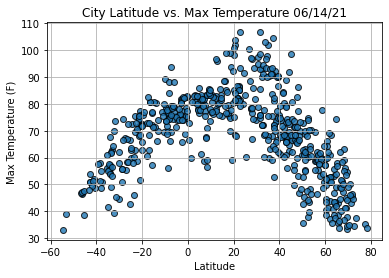

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

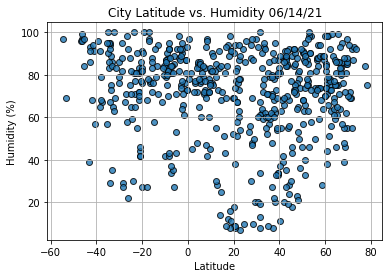

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

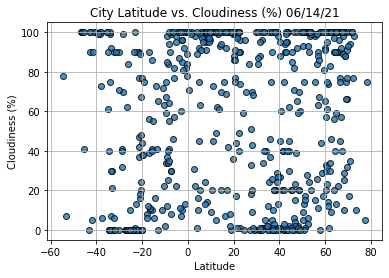

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

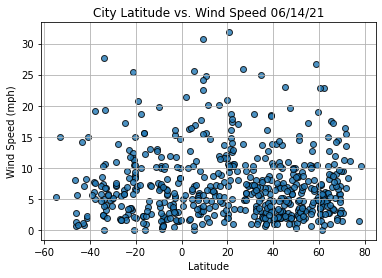

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()